/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies detected:
         gdpp    income  imports  anomaly
91   105000.0   91700.0    142.0        1
123   70300.0  125000.0     23.8        1


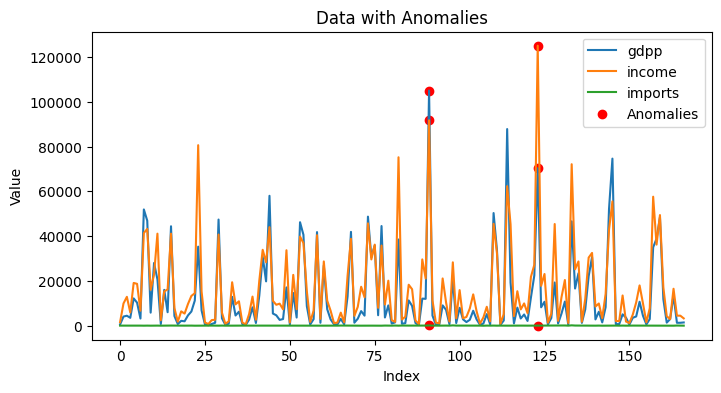

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Load the CSV file from the specified path
file_path = '/content/Country-data.csv'  # Change this path to your actual file path
df = pd.read_csv(file_path)

# Update the following lines with the correct column names for the data columns
data_columns = ['gdpp', 'income', 'imports']  # Replace with your actual column names

# Check if the columns exist
missing_columns = [col for col in data_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Columns '{missing_columns}' not found in the DataFrame columns: {df.columns}")

# Preprocess the data
df = df[data_columns]
df = df.apply(pd.to_numeric, errors='coerce')  # Ensure all columns are numeric

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=data_columns)

# Anomaly Detection using Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination based on your dataset
model.fit(df_imputed)
df_imputed['anomaly'] = model.predict(df_imputed)
df_imputed['anomaly'] = df_imputed['anomaly'].apply(lambda x: 1 if x == -1 else 0)
anomalies = df_imputed[df_imputed['anomaly'] == 1]

# Display anomalies
print("Anomalies detected:")
print(anomalies)

# Visualize anomalies
plt.figure(figsize=(8, 4))
for column in data_columns:
    plt.plot(df_imputed.index, df_imputed[column], label=f'{column}')
plt.scatter(anomalies.index, anomalies[data_columns[0]], color='red', label='Anomalies')
plt.scatter(anomalies.index, anomalies[data_columns[1]], color='red')
plt.scatter(anomalies.index, anomalies[data_columns[2]], color='red')
plt.title('Data with Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

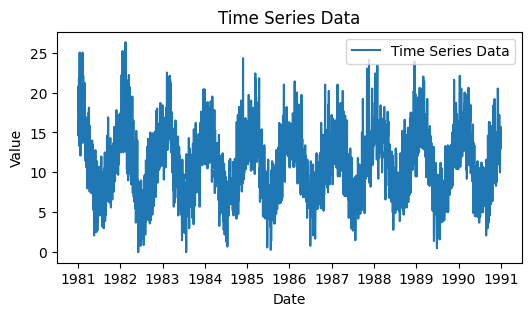

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


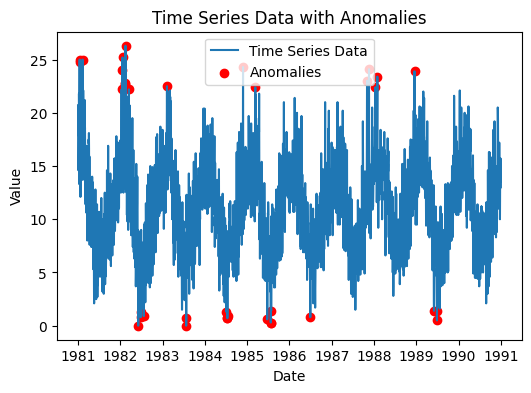

In [ ]:
import pandas as pd
file_path = '/content/daily-minimum-temperatures-in-me.csv'  # Change this path to your actual file path
df = pd.read_csv(file_path)
# Update the following line with the correct column name for the date and value columns
date_column = 'Date'  # Change 'Date' to the actual column name if different
value_column = 'Daily minimum temperatures'  # Change 'Daily minimum temperatures' to the actual data column name
if date_column not in df.columns:
    raise KeyError(f"Column '{date_column}' not found in the DataFrame columns: {df.columns}")
if value_column not in df.columns:
    raise KeyError(f"Column '{value_column}' not found in the DataFrame columns: {df.columns}")
df[date_column] = pd.to_datetime(df[date_column])
df.set_index(date_column, inplace=True)
df[value_column] = pd.to_numeric(df[value_column], errors='coerce')  # Ensure the value column is numeric
df.fillna(method='ffill', inplace=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(df[value_column], label='Time Series Data')  # Use the correct value column name
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)  # Adjust contamination based on your dataset
model.fit(df[[value_column]])  # Use the correct value column name
df['anomaly'] = model.predict(df[[value_column]])
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)
anomalies = df[df['anomaly'] == 1]
plt.figure(figsize=(6, 4))
plt.plot(df[value_column], label='Time Series Data')
plt.scatter(anomalies.index, anomalies[value_column], color='red', label='Anomalies')
plt.title('Time Series Data with Anomalies')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

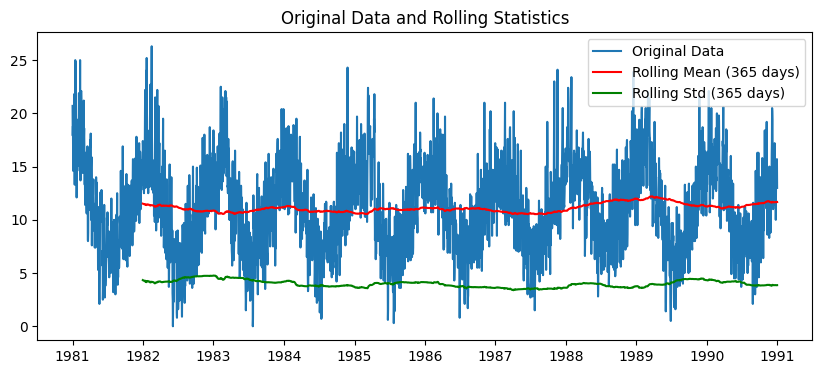

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the path in the Colab environment
file_path = '/content/daily-minimum-temperatures-in-me.csv'  # Replace with your file's path
df = pd.read_csv(file_path)

# Rename 'Date' to 'timestamp' and 'Daily minimum temperatures' to 'temperature' for consistency
df.rename(columns={'Date': 'timestamp', 'Daily minimum temperatures': 'temperature'}, inplace=True)

# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Convert 'temperature' to numeric, coerce errors to NaN
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Define a window size for rolling statistics (e.g., 365 days for yearly seasonality)
window_size = 365

# Calculate rolling mean and standard deviation
rolling_mean = df['temperature'].rolling(window=window_size).mean()
rolling_std = df['temperature'].rolling(window=window_size).std()

# Plot original data and rolling statistics
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['temperature'], label='Original Data')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean (365 days)', color='red')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std (365 days)', color='green')
plt.title('Original Data and Rolling Statistics')
plt.legend()
plt.show()

Mean Squared Error: 16.85017447481351


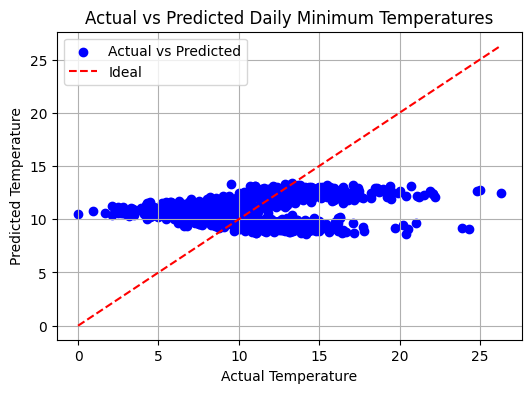

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/daily-minimum-temperatures-in-me.csv")

# Preprocess the date column
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop the original 'Date' column
data.drop('Date', axis=1, inplace=True)

# Convert the target variable to numeric, replacing non-numeric values with NaN
data['Daily minimum temperatures'] = pd.to_numeric(data['Daily minimum temperatures'], errors='coerce')

# Drop rows with NaN values in the target variable
data.dropna(subset=['Daily minimum temperatures'], inplace=True)

# Update X and y
X = data[['Year', 'Month', 'Day']]
y = data['Daily minimum temperatures']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model
svm_model = SVR(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
import matplotlib.pyplot as plt

# Plot actual vs predicted temperatures
plt.figure(figsize=(6, 4))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.title('Actual vs Predicted Daily Minimum Temperatures')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

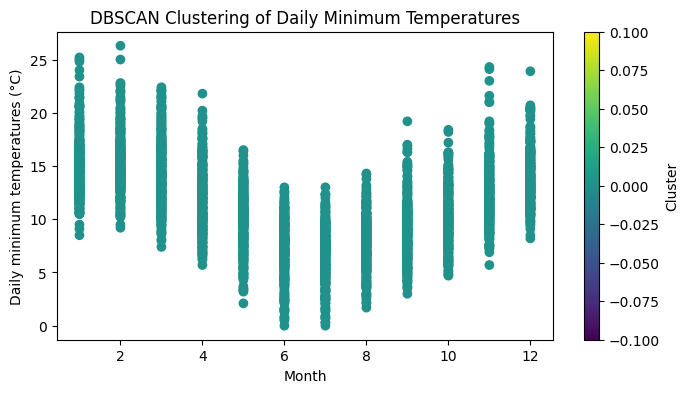

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("/content/daily-minimum-temperatures-in-me.csv")

data['Date'] = pd.to_datetime(data['Date'])

# Extracting month and day from the date
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Dropping unnecessary columns
data.drop(['Date'], axis=1, inplace=True)

# Handling non-numeric values
data['Daily minimum temperatures'] = pd.to_numeric(data['Daily minimum temperatures'], errors='coerce')

# Dropping rows with NaN values
data.dropna(subset=['Daily minimum temperatures'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(data[['Month', 'Day']])  # Considering only month and day for clustering

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(8, 4))
plt.scatter(data['Month'], data['Daily minimum temperatures'], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering of Daily Minimum Temperatures')
plt.xlabel('Month')
plt.ylabel('Daily minimum temperatures (°C)')
plt.colorbar(label='Cluster')
plt.show()

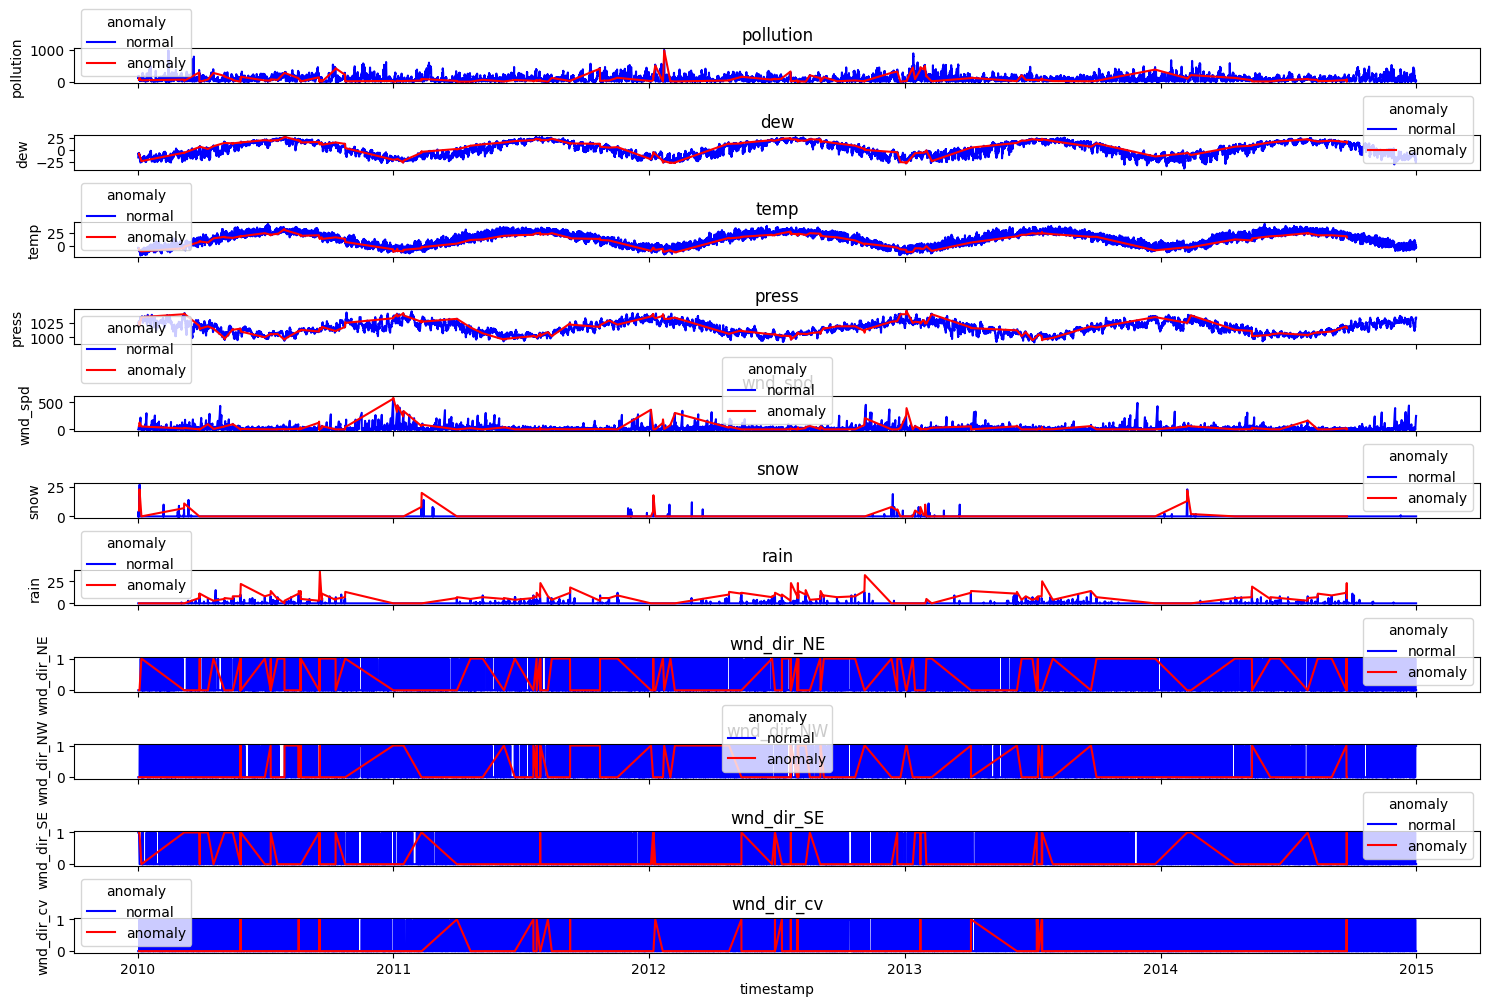

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import seaborn as sns
file_path = '/content/LSTM-Multivariate_pollution.csv'
df = pd.read_csv(file_path)

# Convert non-numeric 'wnd_dir' column to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['wnd_dir'])

# Adjust the column name if 'timestamp' is named differently, here it is 'date'
df.rename(columns={'date': 'timestamp'}, inplace=True)

# Preprocess the data
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df.resample('H').mean().interpolate()

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df_scaled)
df['anomaly'] = df['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')

# Visualization
fig, axes = plt.subplots(nrows=len(df.columns)-1, ncols=1, figsize=(15, 10), sharex=True)
for i, col in enumerate(df.columns[:-1]):
    sns.lineplot(x=df.index, y=df[col], ax=axes[i], hue=df['anomaly'],
                 palette={'normal': 'blue', 'anomaly': 'red'})
    axes[i].set_title(col)
plt.tight_layout()
plt.show()